# PROJECT ON MACHINE LEARNING CLASSIFICATION MODELS

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data.

In this project we will be using 

1.logistic regression

2.KNN

3.Random forest

4.Adaboost

5.SVM 

6.Random forest in SparkML


In [32]:
import os
os.chdir(r'C:\Users\Reshma\Desktop\dmasm\notebooks\data')
os.getcwd()

'C:\\Users\\Reshma\\Desktop\\dmasm\\notebooks\\data'

### Importing libraries

In [33]:
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# For feature selection
from scipy import stats

# For model selection, modelling and testing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [34]:
 df = pd.read_csv(r'C:\Users\Reshma\Desktop\dmasm\notebooks\data\healthcare-dataset-stroke-data.csv')

## Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) Marital_status: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.




In [35]:
df.head()

,id,gender,age,hypertension,heart_disease,Marital_status,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   Marital_status     5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


NOTE:-This data set has 7 numerical columns and 5 categorical columns

In [37]:
print("Dataframe Details")
print("Total Rows: {}\nTotal Columns: {}".format(df.shape[0],df.shape[1]))

Dataframe Details
Total Rows: 5110
Total Columns: 12


In [38]:
#Drop id 
df.drop(columns=['id'],inplace=True) 

In [39]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### MISSING VALUES

In [40]:
#checking for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
Marital_status         0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We can see there are 201 records which does not have BMI values. Now, removing those records is not a good idea bcoz its around 4 % of our total data

In [41]:
#filling missing values
# Imputing the missing values with the mean
df=df.fillna(np.mean(df['bmi']))
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
Marital_status       0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [42]:
#gettin columns' names spicially sometimes there is a space or unders score in some columns' names
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'Marital_status',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Getting Categorical columns and numerical columns

Signature: df.select_dtypes(include=None, exclude=None) -> 'DataFrame'
Docstring:
Return a subset of the DataFrame's columns based on the column dtypes.

In [43]:

#finding just unique values
df.apply(lambda x: len(x.unique()))

gender                  3
age                   104
hypertension            2
heart_disease           2
Marital_status          2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [44]:

# Filter categorical variables
categorical_columns= {x for x in df.dtypes.index if df.dtypes[x]=='object'}
#or
#categorical_columns= [x for x in df.dtypes.index if df.dtypes[x]=='object']

#exculde Id cols and source:
#categorical_columns= [ x for x in categorical_columns
#                     if x not in ['Loan_ID', 'Customer_ID']]
#Print frequencey of categories
for col in categorical_columns:
    print (f'\nFrequency of Categories for {col} column')
    print(df[col].value_counts())


Frequency of Categories for smoking_status column
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Frequency of Categories for work_type column
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Frequency of Categories for Residence_type column
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Frequency of Categories for gender column
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Frequency of Categories for Marital_status column
Yes    3353
No     1757
Name: Marital_status, dtype: int64


#### OUTLIER ANALYSIS

Potential outliers are observations that lie outside the lower and upper limits. 
Lower limit = Q1 - 1.5 * IQR 
Upper limit = Q3 + 1.5 * IQR

1)lower inner fence: Q1 - 1.5*IQR
2)upper inner fence: Q3 + 1.5*IQR
3)lower outer fence: Q1 - 3*IQR
4)upper outer fence: Q3 + 3*IQR
Data values that lie between the inner and outer fences are considered possible outliers or potential outliers; 
those that lie outside the outer fences are considered probable outliers or extreme outlier

In [45]:
# Assigning columns as numerical variables
numeric_cols = ['age', 'bmi', 'avg_glucose_level']
dfnum=df[numeric_cols]

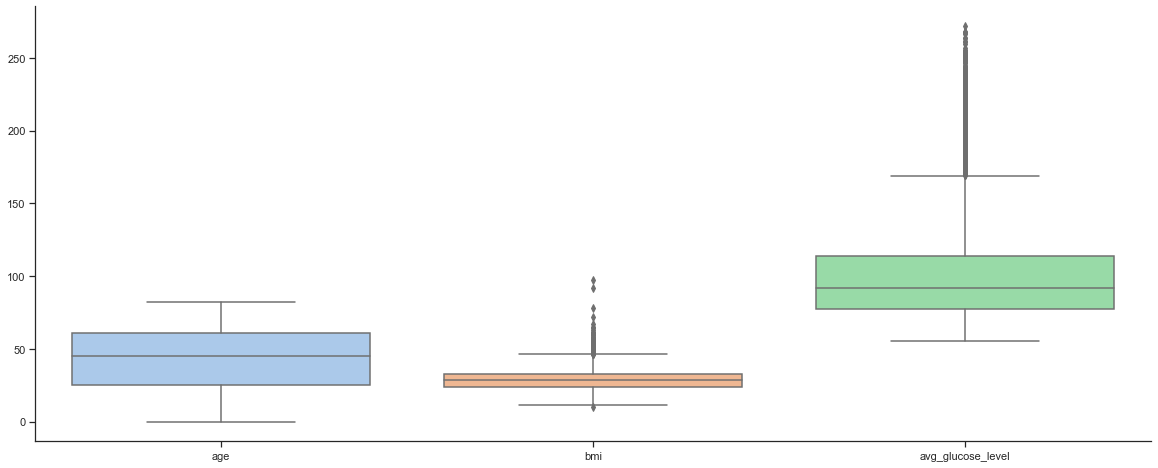

In [46]:
sns.set_theme(style='ticks',palette='pastel')
plt.figure(figsize=(20,8))
sns.boxplot(data=dfnum)
sns.despine()

It can be seen that bmi and avg_glucose_level columns has potential outliers which needs to be handled 

bmi above 50 can be treated as oulier in normal real cases but i prefer to leave the ouliers in avg_glucose_level column as this data set has majory class as non stroke cases so there will be a fluctaion with the stroke case

In [47]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    data_out =df[(df[col]<LIF) | (df[col]>UIF)] # I created a new data set that has just include potential outliers
    return data_out[col] .describe(),data_out[col],len(data_out)

In [48]:
bmi_outliers_summary, bmi_outliers,length_bmi = outlier_analysis("bmi")
bmi_outliers=bmi_outliers.values.tolist()
#Removing the outliers of bmi 
for num, i in enumerate(df['bmi']):
    if i in bmi_outliers:
        df['bmi'][num] =df.bmi.mean()

<AxesSubplot:ylabel='bmi'>

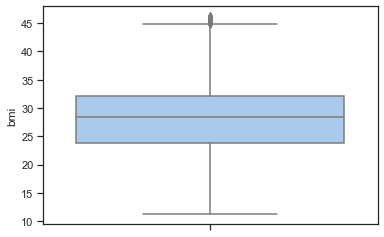

In [49]:
sns.boxplot( y=df['bmi'] )

In [50]:
df['bmi'].describe()

count    5110.000000
mean       28.292054
std         6.548553
min        11.300000
25%        23.800000
50%        28.371286
75%        32.200000
max        46.200000
Name: bmi, dtype: float64

## VISUALISATION

Text(0.5, 1.0, 'Kde Plots for age, avg_glucose_level and bmi')

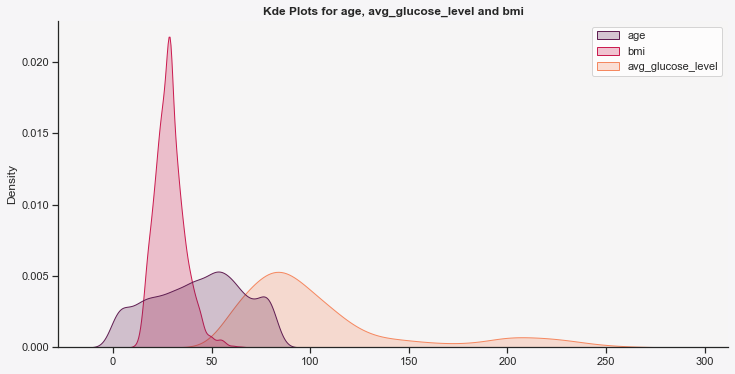

In [19]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(data=dfnum,shade=True,palette='rocket') # Distributions
# removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for age, avg_glucose_level and bmi',weight='bold')

Observations :
1) The avg_glucose_level is heavily skewed towards right and most of the distribution is between 50-150.

2) The bmi is between 0 and 50 for most of the people.

3) The age is distributed between 0 and 100 almost evenly.

4) The data is not normally distributed (have to normalize or standardize).

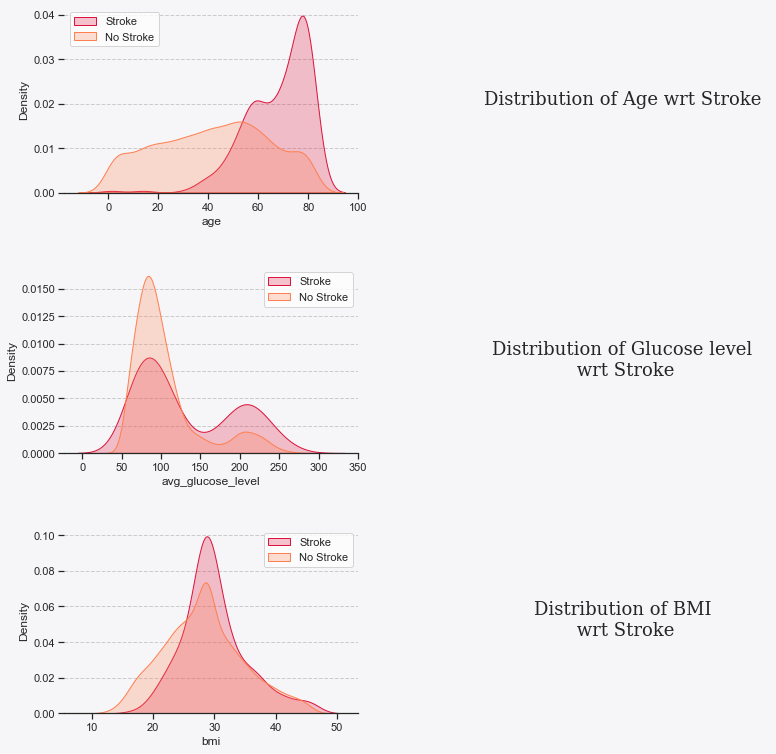

In [20]:
fig = plt.figure(figsize=(20,13))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
sns.kdeplot(ax=ax0,x=df.loc[df['stroke']==1]['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax0,x=df.loc[df['stroke']==0]['age'],color='coral',label='No Stroke',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')

ax1.text(0.5,0.5,'Distribution of Age wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')

sns.kdeplot(ax=ax2,x=df.loc[df['stroke']==1]['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax2,x=df.loc[df['stroke']==0]['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')

ax3.text(0.5,0.5,'Distribution of Glucose level\n wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')


sns.kdeplot(ax=ax4,x=df.loc[df['stroke']==1]['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax4,x=df.loc[df['stroke']==0]['bmi'],color='coral',label='No Stroke',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')

ax5.text(0.5,0.5,'Distribution of BMI\n wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
# removing labels

axes1=[ax1,ax3,ax5]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

<AxesSubplot:>

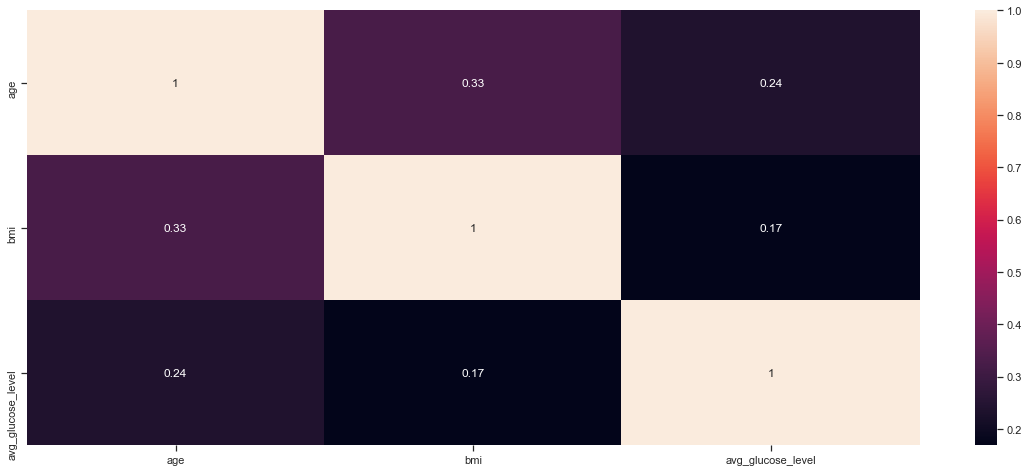

In [21]:
#Correlation in the df DataFrame
import seaborn as sns
figure = plt.figure(figsize=(20,8))
sns.heatmap(dfnum.corr(),annot=True)

As there is no strong correlation between the variables, we can ignore the chances of multicollinearity.

<Figure size 2000x1500 with 0 Axes>

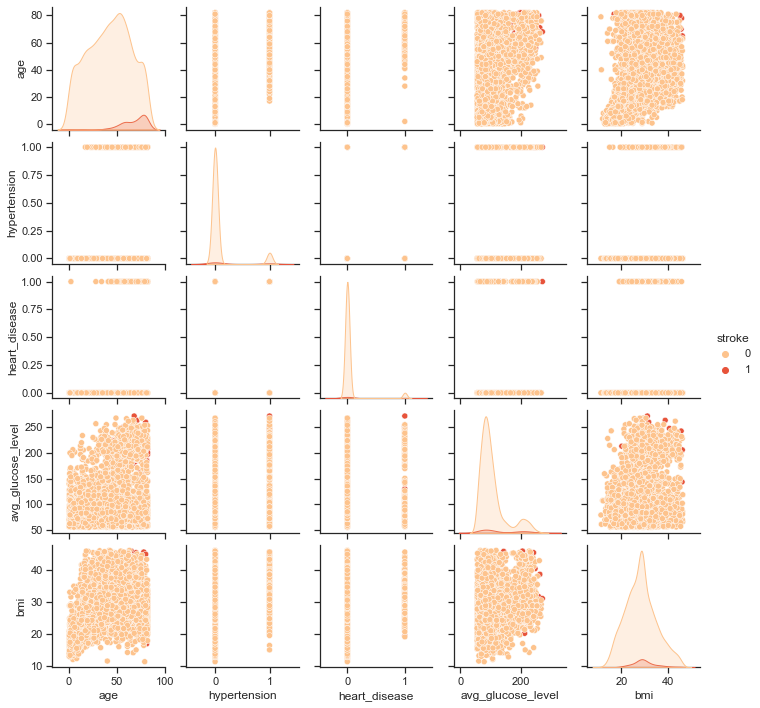

In [22]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=df,hue='stroke',size=2,palette='OrRd')
plt.show()

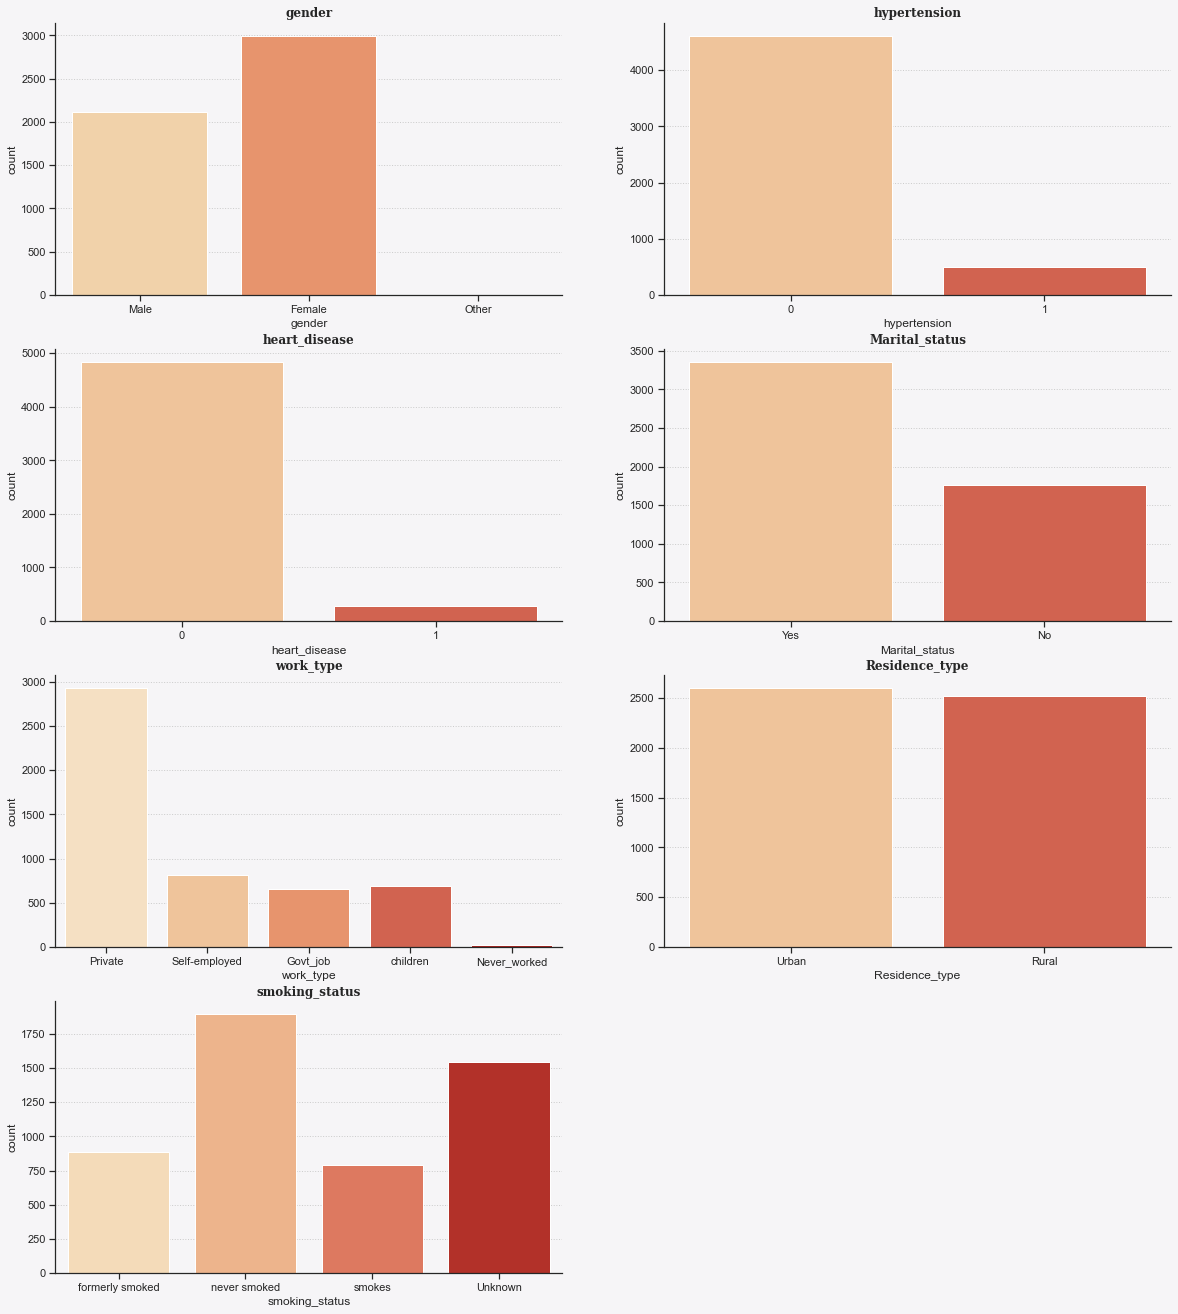

In [23]:
data_categorical=df[['gender', 'hypertension', 'heart_disease', 'Marital_status','work_type', 'Residence_type','smoking_status']]

fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette='OrRd')


Observations :
1) Females are more than male in our data. The Other category in gender is not visible as it contains only one value.

2) The number of people without hypertension are way less than people who has it.

3) The number of people with heart disease is extremely low.

4) The number of people who are married are way more than unmarried people(makes sense as the distribution is between 0 and 60)

5) People seem to prefer working in private companies while the number of self-emplyed/ govt_job and children seems to be equal in number (children can be ignored). Unemployed people are extremely less.

6) Not a big difference between the population in urban and rural area.

7) The Unknown category reprsents that we do not know if a person smoked or not. If the size of unknown is too large then we will remove it from our model. Non-smokers are way more than people who smoked/used to smoke which is a good thing.

8) Number of people with strokes are less than 1000 in number.

#### Analysing Categorical Variables with Stroke

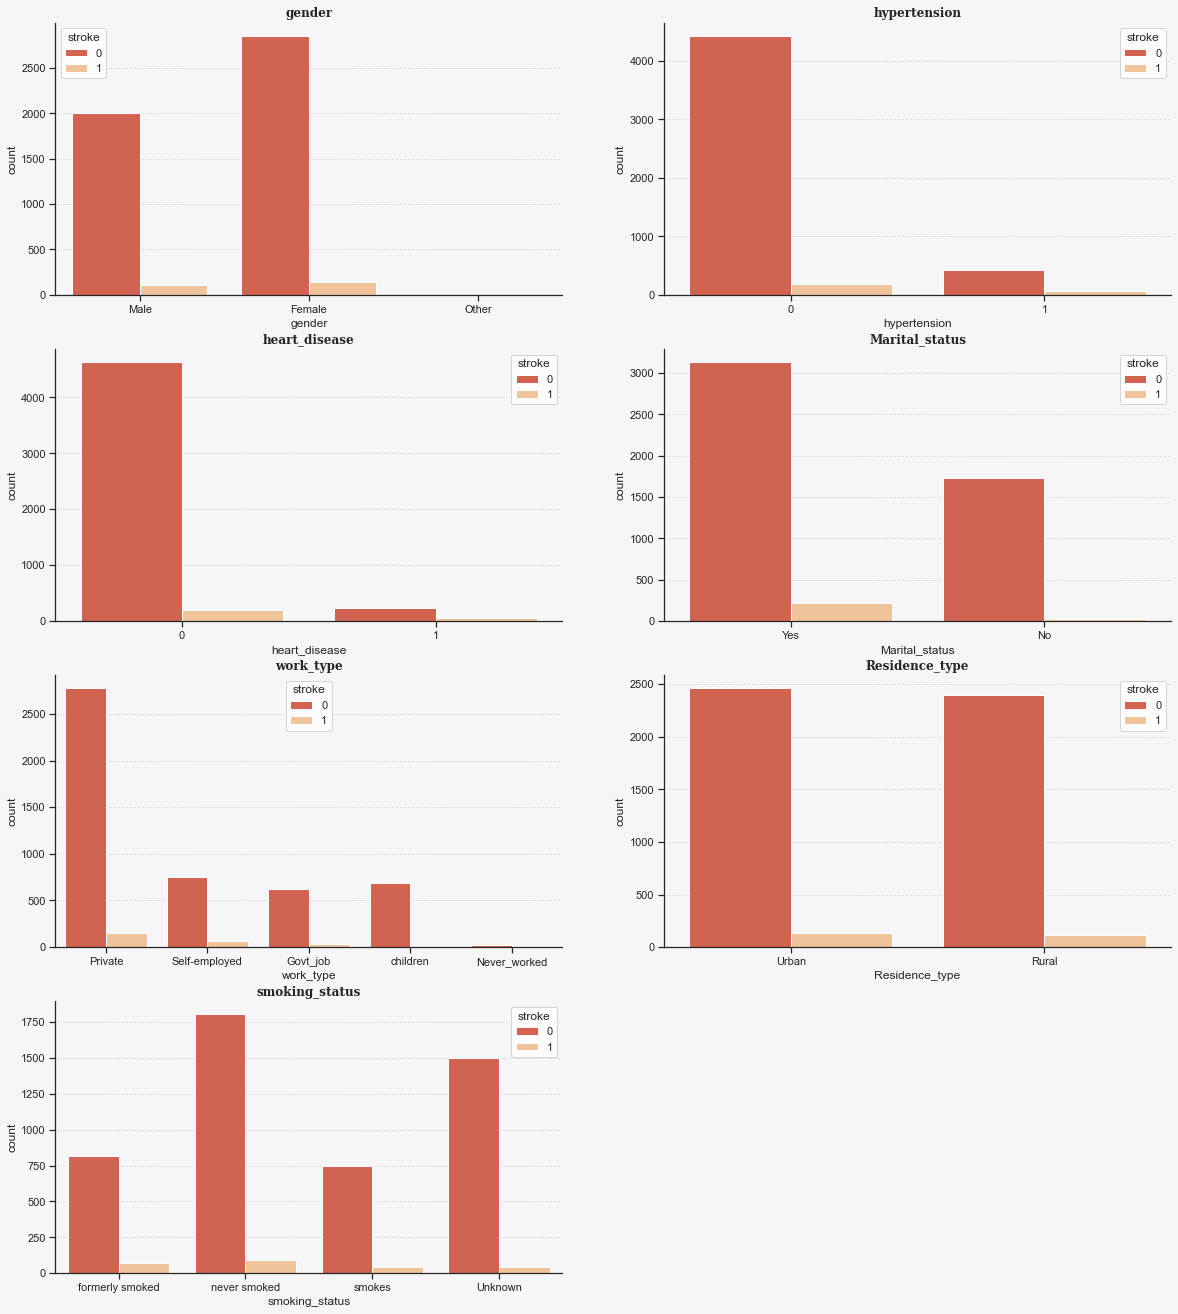

In [24]:
data_cat=df[['gender', 'hypertension', 'heart_disease', 'Marital_status','work_type', 'Residence_type','smoking_status']]

fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_cat[val],palette='OrRd_r',hue=df['stroke'])

Observations :
1) Seems that number of male and female who has stroke are equal in number.

2) The number of people who do not have hypertension also shows signs of no stroke. And people with hypertension also do not show signs of  stroke (may be due to the fact that our data has so many negative(0) variables).

3) The people with heart diesease show signs of stroke too.

4) The people who got married show signs of stroke way more than people who are unmarried.

5) Private employees seems to experience stroke more than other work_types(may be due to work pressure). Self-employed people do show signs of stroke(may be due to reasons like heart disease,tension etc). Children can be ignored.

6) Almost no difference between people living in urban and rural areas in terms of stroke occurence.

7) People who formerly smoked and who smoke (combined) are showing signs of stroke way more than people who never smoked (considering the sample size of people who never smoked and people who used to smoke and smoke now).

<Figure size 720x720 with 0 Axes>

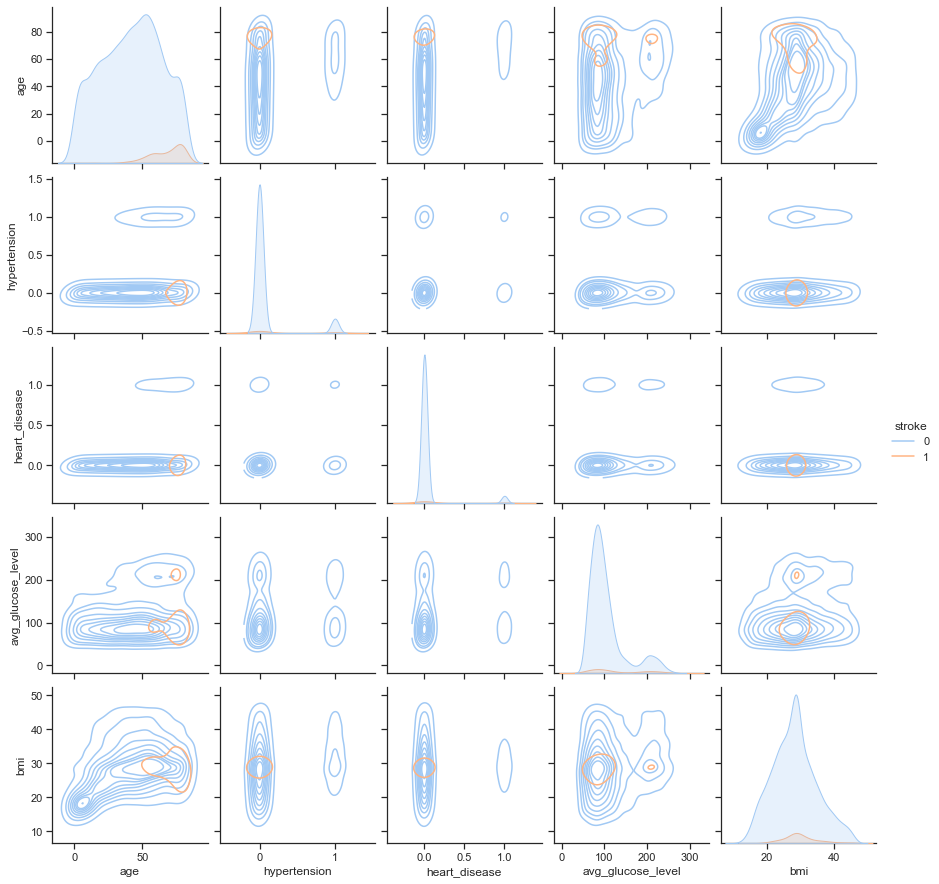

In [25]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(df[['gender','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']],hue='stroke',kind='kde')
plt.show()

Age,hypertension ,heart disease doesnt seem to separate stroke. from the above pair plot having overlapping peaks across stork=1 and 0 signifies these variables are not strong enough to separate/explaing the stroke.
The distribution of residence type across the stroke is not significant.
There is a little of variation in smoking status for stroke =1.
A lot of extreme values are observed in avg glucode level.

<AxesSubplot:xlabel='age', ylabel='Count'>

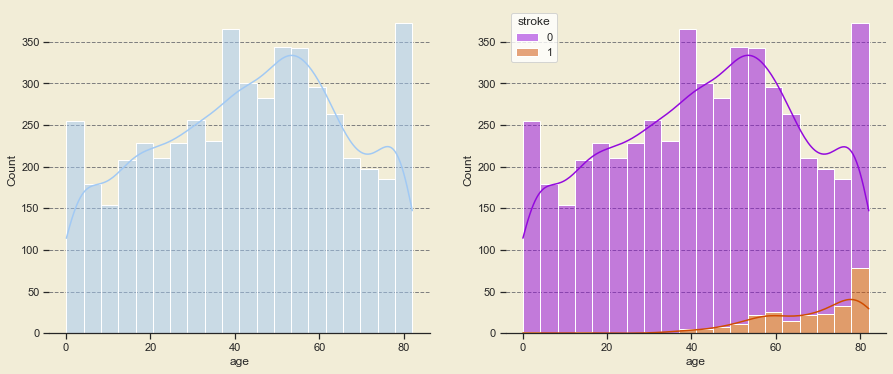

In [26]:
nrows=1
ncols=2
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
f.patch.set_facecolor('#F2EDD7FF')

#Setting background and foreground color
for j in range(0,ncols):
    ax[j].set_facecolor('#F2EDD7FF')
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['left'].set_visible(False)
    ax[j].grid(linestyle="--",axis='y',color='gray')
        
        
sns.histplot(data=df,x='age',ax=ax[0],palette="Set1",kde="True")
sns.histplot(data=df,x='age',hue='stroke',multiple='stack',ax=ax[1],palette="gnuplot",kde=True)

It can be seen that the stroke category is concentrated toward the higher age category (40 and above)

### Shuffling Data

There is a crucial assumption made by any supervised ML approach: both the training set and the set are samples drawn from the same population. This means that the model expects to see the same distribution of features in the test set as in the training set.In order to make sure that this assumption is satisfied, it is important to shuffle the instances before splitting between training set and test set. This will avoid any visible or invisible bias due to the order in which the data was collected or assembled. from sklearn.utils import shuffle

In [29]:
# shuffle the dataframe
from sklearn.utils import shuffle
df = shuffle(df, random_state=0)
print(df.head())


      gender   age  hypertension  heart_disease Marital_status work_type  \
3871  Female  60.0             1              0            Yes   Private   
4050  Female  26.0             0              0             No   Private   
2416  Female  47.0             0              0            Yes   Private   
4422  Female  20.0             0              0             No  Govt_job   
2595    Male  13.0             0              0             No  children   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
3871          Rural              78.26  41.700000  formerly smoked       0  
4050          Rural              58.55  29.000000     never smoked       0  
2416          Urban              86.99  28.900000           smokes       0  
4422          Rural              79.53  28.893237     never smoked       0  
2595          Rural              97.97  24.500000     never smoked       0  


In [51]:
import os
os.chdir(r'C:\Users\Reshma\Desktop\dmasm\notebooks\data')
os.getcwd()
df.to_csv("new_classification1_try.csv")

### TRANSFORMATION - ENCODING

In [32]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

print(df["gender"].value_counts())
df["gender"] = encode.fit_transform(df["gender"])
df["gender"] = df["gender"].astype("int64")
print(df["gender"].value_counts())
print("____________________________")
print(df["Marital_status"].value_counts())
df["Marital_status"] = encode.fit_transform(df["Marital_status"])
df["Marital_status"] = df["Marital_status"].astype("int64")
print(df["Marital_status"].value_counts())
print("____________________________")

print(df["Residence_type"].value_counts())
df["Residence_type"] = encode.fit_transform(df["Residence_type"])
df["Residence_type"] = df["Residence_type"].astype("int64")
print(df["Residence_type"].value_counts())
print("____________________________")

print(df["work_type"].value_counts())
df["work_type"] = encode.fit_transform(df["work_type"])
df["work_type"] = df["work_type"].astype("int64")
print(df["work_type"].value_counts())
print("____________________________")

print(df["smoking_status"].value_counts())
df["smoking_status"] = encode.fit_transform(df["smoking_status"])
df["smoking_status"] = df["smoking_status"].astype("int64")
print(df["smoking_status"].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
0    2994
1    2115
2       1
Name: gender, dtype: int64
____________________________
Yes    3353
No     1757
Name: Marital_status, dtype: int64
1    3353
0    1757
Name: Marital_status, dtype: int64
____________________________
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
1    2596
0    2514
Name: Residence_type, dtype: int64
____________________________
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64
____________________________
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64


### Balance of data

A balanced dataset is the one that contains equal or almost equal number of samples from the positive and negative class. If the samples from one of the classes outnumbers the other , the data is skewed in favour of one of the class.

In [33]:
print(df["stroke"].value_counts())

0    4861
1     249
Name: stroke, dtype: int64


In [34]:
perc_Nostroke=4861/5110
perc_stroke=249/5110
print("Perecntage of No Stroke in stroke column-->",perc_Nostroke*100)
print("Perecntage of Stroke in stroke column-->",perc_stroke*100)

Perecntage of No Stroke in stroke column--> 95.12720156555773
Perecntage of Stroke in stroke column--> 4.87279843444227


0    4861
1     249
Name: stroke, dtype: int64

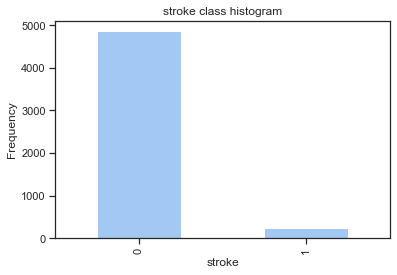

In [35]:
pd.value_counts(df['stroke']).plot.bar()
plt.title('stroke class histogram')
plt.xlabel('stroke')
plt.ylabel('Frequency')
df['stroke'].value_counts()

It can be seen that the data is highly imbalanced with only 4 percentage of the data belonging to the second class which is the stroke cases,to deal with this we should do oversampling 

#### Random Oversampling Imbalanced Datasets

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

This technique can be effective for those machine learning algorithms that are affected by a skewed distribution and where multiple duplicate examples for a given class can influence the fit of the model. This might include algorithms that iteratively learn coefficients, like artificial neural networks that use stochastic gradient descent. It can also affect models that seek good splits of the data, such as support vector machines and decision trees.

It might be useful to tune the target class distribution. In some cases, seeking a balanced distribution for a severely imbalanced dataset can cause affected algorithms to overfit the minority class, leading to increased generalization error. The effect can be better performance on the training dataset, but worse performance on the holdout or test dataset.

#### Synthetic Minority Oversampling Technique
A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

### Here in this project i will be using SMOT to do oversampling to treat the imbalance in my dataset

In [500]:
import os
os.chdir(r'C:\Users\Reshma\Desktop\dmasm\notebooks\data')
os.getcwd()
df.to_csv("new_df_try.csv")

### DEPENDENT AND INDEPENDENT VARIABLES

In [36]:
#Packaging the independent variables into X Dataframe
X= df.drop("stroke",axis=1)#class is the target variable
#Packaging the independent variables into y Dataframe
y = df["stroke"]

In [388]:
#Split into training and test set for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.20)
X_train1=X_train.copy()
y_train1=y_train.copy()
X_test.head()

,gender,age,hypertension,heart_disease,Marital_status,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3871,0,60.0,1,0,1,2,0,78.26,41.700000,1
4050,0,26.0,0,0,0,2,0,58.55,29.000000,2
2416,0,47.0,0,0,1,2,1,86.99,28.900000,3
4422,0,20.0,0,0,0,0,0,79.53,28.893237,2
2595,1,13.0,0,0,0,4,0,97.97,24.500000,2


In [38]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4088, 10)
Number transactions y_train dataset:  (4088,)
Number transactions X_test dataset:  (1022, 10)
Number transactions y_test dataset:  (1022,)


In [39]:
from imblearn.over_sampling import SMOTE

In [389]:
print("Before OverSampling, counts of label '1-Stroke cases': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0-No Stroke cases': {} \n".format(sum(y_train==0)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1-Stroke cases': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0-No Stroke cases': {}".format(sum(y_train_sm==0)))

Before OverSampling, counts of label '1-Stroke cases': 206
Before OverSampling, counts of label '0-No Stroke cases': 3882 

After OverSampling, the shape of train_X: (7764, 10)
After OverSampling, the shape of train_y: (7764,) 

After OverSampling, counts of label '1-Stroke cases': 3882
After OverSampling, counts of label '0-No Stroke cases': 3882


In [390]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train_sm),columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X.columns)
#X_train1 = pd.DataFrame(sc.fit_transform(X_train1),columns=X.columns)
#X_test1 = pd.DataFrame(sc.transform(X_test),columns=X.columns)
#X_train1.head()

## MODEL1- LOGISTIC REGRESSION

In [281]:
#import Logistic Regression 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
log_model = LogisticRegression(max_iter=500,tol=0.001,solver='liblinear')
log_model.fit(X_train_scaled,y_train_sm)

LogisticRegression(max_iter=500, solver='liblinear', tol=0.001)

In [282]:
log_model.intercept_ #b0

array([-0.19443416])

In [283]:
log_model.coef_ #coefficients of the features, b1, b2, ...

array([[-0.38914676,  2.09219935, -0.26518315, -0.19992921, -0.48072191,
        -0.33862564, -0.49296158,  0.37270107,  0.19534448, -0.3387124 ]])

In [284]:
#Predict_proba gives the probabilities P(y=Ci|x)
log_model.predict_proba(X_test_scaled)

array([[0.46914528, 0.53085472],
       [0.88772874, 0.11227126],
       [0.90813686, 0.09186314],
       ...,
       [0.12594061, 0.87405939],
       [0.99832803, 0.00167197],
       [0.81856   , 0.18144   ]])

In [285]:
probabilities_test = log_model.predict_proba(X_test_scaled)[:,1]
probabilities_test[10:20] #second column belongs to class 1, ie, p = P(y=1|x)

array([0.01316623, 0.13728916, 0.75302443, 0.00169153, 0.61850639,
       0.29951046, 0.03394969, 0.58747351, 0.00353654, 0.01700635])

In [286]:
#Whereas predict method gives the class prediction as either 0 or 1
y_predict = log_model.predict(X_test_scaled)
y_predict[10:20]

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [287]:
#Predictions based on a different threshold value
from sklearn.preprocessing import binarize
y_predict_thresh = binarize(probabilities_test.reshape(-1,1),threshold=0.5)
y_predict_thresh[10:20]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [289]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

log_model.score(X_test_scaled,y_test)

0.7720156555772995

In [290]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.7720156555772995

In [291]:
'''
        Predicted
        0   1
True  0 TN  FP
      1 FN  TP

'''
cm1 = confusion_matrix(y_test,y_predict)
print(cm1)

[[761 218]
 [ 15  28]]


In [292]:
#Confusion matrix corresponding prob threshold = 0.5
cm2 = confusion_matrix(y_test,y_predict_thresh)
cm2

array([[761, 218],
       [ 15,  28]], dtype=int64)

In [293]:
#Fpr = fp/(tn+fp)
#tpr = tp/(fn+tp)

fpr1= 218/979
fpr2 = 218/979

tpr1 = 28/43
tpr2 = 28/43

In [294]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       979
           1       0.11      0.65      0.19        43

    accuracy                           0.77      1022
   macro avg       0.55      0.71      0.53      1022
weighted avg       0.94      0.77      0.84      1022



In [296]:
print("Cross Validation of X and y Train: ")
print(cross_val_score(log_model,X_train_scaled, y_train_sm, cv=5).mean())
print("..........."*10)
print("Train Accuracy Score: ",log_model.score(X_train_scaled, y_train_sm)) 
print("..........."*10)
y_pred = log_model.predict(X_test_scaled)
print("Test Accuracy Score: ",log_model.score(X_test_scaled,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

Cross Validation of X and y Train: 
0.8016521066641884
..............................................................................................................
Train Accuracy Score:  0.8025502318392581
..............................................................................................................
Test Accuracy Score:  0.7720156555772995
..............................................................................................................
Confusion Matrix
 
[[761 218]
 [ 15  28]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       979
           1       0.11      0.65      0.19        43

    accuracy                           0.77      1022
   macro avg       0.55      0.71      0.53      1022
weighted avg       0.94      0.77      0.84      1022



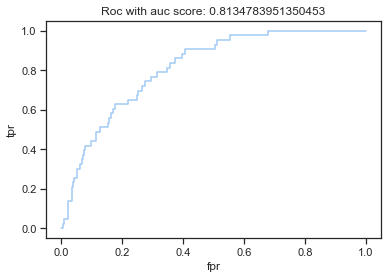

In [120]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

### Interpretation

Here we have an AUC 0.81 and test Accuracy score of 77% which denotes our model is a good fit one for our data.But from the report it can be seen that there is small between the tain score and test accuracy score but it does not  indicate the overfit of the model.When it comes to precision and recall Srtoke category doesnot have a good enogh score.This model is much of use to predict relevant stroke classes,this might be due to inmbalanced data and oversamping

#### Hyper parameter tuning

In [177]:
param_grid = {'C': [0.01, 0.1, 1, 10],
             'penalty':['l1', 'l2'],'solver' : ['liblinear']}

#logreg = LogisticRegression(random_state=2)

grid_search_lr = GridSearchCV(model, param_grid=param_grid, scoring='recall', cv=5)

grid_search_lr.fit(X_train_scaled, y_train_sm)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=500, solver='liblinear',
                                          tol=0.001),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='recall')

In [178]:
# The best recall obtained
print(grid_search_lr.best_score_)
#Best parameter on trainning set
print(grid_search_lr.best_params_)

0.8387429160226687
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [179]:
best_model_log = grid_search_lr.best_estimator_

In [180]:
best_model_log.fit(X_train_scaled, y_train_sm)

LogisticRegression(C=0.01, max_iter=500, penalty='l1', solver='liblinear',
                   tol=0.001)

In [181]:
print("Accuracy Score: ",best_model_log.score(X_test_scaled,y_test))  

Accuracy Score:  0.7416829745596869


In [182]:
probabilities_test = best_model_log.predict_proba(X_test_scaled)[:,1]
probabilities_test[10:20] #second column belongs to class 1, ie, p = P(y=1|x)

array([0.02992401, 0.21983298, 0.74420222, 0.0079747 , 0.60849356,
       0.40353945, 0.05214933, 0.63843146, 0.01251076, 0.03996397])

In [183]:
y_pred = best_model_log.predict(X_test_scaled)
y_pred[10:20]

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [184]:
#Predictions based on a different threshold value
from sklearn.preprocessing import binarize
y_predict_thresh = binarize(probabilities_test.reshape(-1,1),threshold=0.5)
y_predict_thresh[10:20]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [185]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_model_log,X_train_scaled, y_train_sm,cv=5).mean()

0.7918628560617627

In [186]:
print("Cross Validation of X and y Train: ")
print(cross_val_score(best_model_log,X_train_scaled, y_train_sm, cv=4).mean())
print("..........."*10)
print("Train Accuracy Score: ",model.score(X_train_scaled, y_train_sm)) 
print("..........."*10)
y_pred = best_model_log.predict(X_test_scaled)
print("Accuracy Score: ",best_model_log.score(X_test_scaled,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

Cross Validation of X and y Train: 
0.7900566718186501
..............................................................................................................
Train Accuracy Score:  0.8025502318392581
..............................................................................................................
Accuracy Score:  0.7416829745596869
..............................................................................................................
Confusion Matrix
 
[[729 250]
 [ 14  29]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       979
           1       0.10      0.67      0.18        43

    accuracy                           0.74      1022
   macro avg       0.54      0.71      0.51      1022
weighted avg       0.94      0.74      0.82      1022



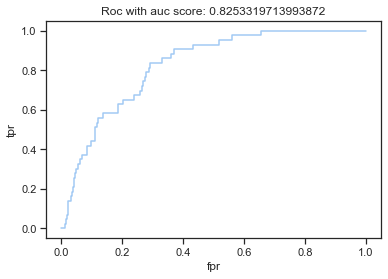

In [187]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = best_model_log.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

### INTERPRETATION

It can been seen that after fitting the model with its best parameters accuracy score has reduced to 74 perecnt from previous 77 percent but there is still a difference in the accuracy score of test and train data. negiligible variations in precision and recall and an AUC 0.825.
though there is a difference in test and train it doen not indicate overfitted model.This model works good for the non stroke classes with .98,.78 preciosn and recall respectively but in second class both are relatively low which might be due to the inbalance of data and oversampling.

# KNN

In [391]:
from sklearn.neighbors import KNeighborsClassifier

In [491]:
knn=KNeighborsClassifier()

In [492]:
knn.fit(X_train1,y_train1)

KNeighborsClassifier()

In [493]:
y_pred = knn.predict(X_test)

In [494]:
y_pred[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [495]:
print(confusion_matrix(y_test,y_pred))

[[968  11]
 [ 43   0]]


In [496]:
knn.score(X_test,y_test)

0.9471624266144814

In [497]:
print("Cross Validation of X and y Train: ")
print(cross_val_score(knn,X_train1, y_train1, cv=5).mean())
print("..........."*10)
print("Train Accuracy Score: ",knn.score(X_train1, y_train1)) 
print("..........."*10)
y_pred = knn.predict(X_test)
print("Accuracy Score: ",knn.score(X_test,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

Cross Validation of X and y Train: 
0.9415372598779601
..............................................................................................................
Train Accuracy Score:  0.9510763209393346
..............................................................................................................
Accuracy Score:  0.9471624266144814
..............................................................................................................
Confusion Matrix
 
[[968  11]
 [ 43   0]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       979
           1       0.00      0.00      0.00        43

    accuracy                           0.95      1022
   macro avg       0.48      0.49      0.49      1022
weighted avg       0.92      0.95      0.93      1022



### Interpretation
here we can see that we have an accuracy of 95% for the training and testing ,both the  scores indicated a good fit model the element  to be aknowledged is that interms of precision and recall the model works best to identify aand return non stroke classes but it fails to do the same for  stroke class ,which might be due to the high amount of imbalance in the data.

### Attempt to find the optimum K value

In [399]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1,y_train1)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

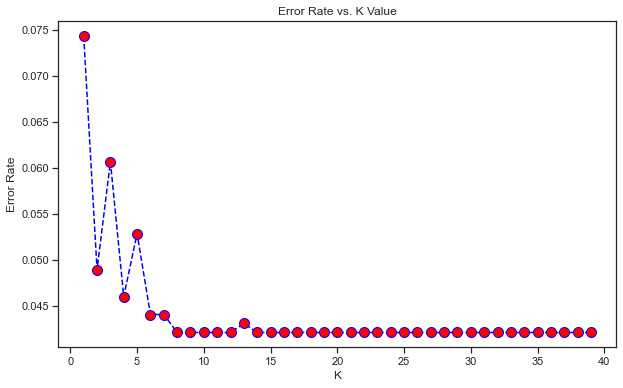

In [400]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Interpretation

from the above graph it can be seen that either K=7/K=14 will be the optimum value for K

In [366]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train1,y_train1)
#print("Training Accuracy Score with K=7: ",knn.score(y_test,y_predict))  
y_pred = knn.predict(X_test_scaled)

print('WITH K=7')
print("Cross Validation of X and y Train: ")
print(cross_val_score(knn,X_train1, y_train1, cv=5).mean())
print("..........."*10)
print("Train Accuracy Score: ",knn.score(X_train1, y_train1)) 
print("..........."*10)
y_pred = knn.predict(X_test)
print("Accuracy Score: ",knn.score(X_test,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

WITH K=7
Cross Validation of X and y Train: 
0.945940332721837
..............................................................................................................
Train Accuracy Score:  0.9483855185909981
..............................................................................................................
Accuracy Score:  0.9559686888454012
..............................................................................................................
Confusion Matrix
 
[[976   3]
 [ 42   1]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.25      0.02      0.04        43

    accuracy                           0.96      1022
   macro avg       0.60      0.51      0.51      1022
weighted avg       0.93      0.96      0.94      1022



In [402]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=14
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train1,y_train1)
#print("Training Accuracy Score with K=14: ",knn.score(y_test,y_predict))  
y_pred = knn.predict(X_test_scaled)

print('WITH K=14')
print("Cross Validation of X and y Train: ")
print(cross_val_score(knn,X_train1, y_train1, cv=5).mean())
print("..........."*10)
print("Train Accuracy Score: ",knn.score(X_train1, y_train1)) 
print("..........."*10)
y_pred = knn.predict(X_test)
print("Accuracy Score: ",knn.score(X_test,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

WITH K=14
Cross Validation of X and y Train: 
0.9491197146217452
..............................................................................................................
Train Accuracy Score:  0.9493639921722113
..............................................................................................................
Accuracy Score:  0.9579256360078278
..............................................................................................................
Confusion Matrix
 
[[979   0]
 [ 43   0]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



### Interpretation
here we can see that we have an accuracy of 95% for the training and 96% for testing ,both the scores indicated a good fit model the element to be aknowledged is that interms of precision and recall the model works best to identify aand return non stroke classes but it fails to do the same for stroke class ,which might be due to the high amount of imbalance in the data.

#### HYPER PARAMETER TUNING

In [403]:
params = {
            'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'weights':['uniform', 'distance'],
            'metric' :['euclidean','manhattan']
        }
knn_model = GridSearchCV(KNeighborsClassifier(), params,cv=5)
knn_model.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']})

In [404]:
knn_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}

In [405]:
knn_model.best_score_

0.9496087121767574

In [406]:
best_model_knn = knn_model.best_estimator_

In [407]:
best_model_knn.fit(X_train1,y_train1)

KNeighborsClassifier(metric='manhattan', n_neighbors=14)

In [408]:
y_pred = best_model_knn.predict(X_test)
from sklearn.metrics import classification_report

print("Cross Validation of X and y Train: ")
print(cross_val_score(best_model_knn,X_train1,y_train1, cv=5).mean())
print("..........."*10)
y_pred = best_model_knn.predict(X_test_scaled)
print("Train Accuracy Score: ",best_model_knn.score(X_train1,y_train1))  
print("..........."*10)
print("Test Accuracy Score: ",best_model_knn.score(X_test,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

Cross Validation of X and y Train: 
0.9496087121767574
..............................................................................................................
Train Accuracy Score:  0.9493639921722113
..............................................................................................................
Test Accuracy Score:  0.9569471624266145
..............................................................................................................
Confusion Matrix
 
[[979   0]
 [ 43   0]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



### Interpretation
Here we can see that we have an accuracy of 95% for the training and 96% for testing ,both the scores indicated a good fit model the element to be aknowledged is that interms of precision and recall the model works best to identify aand return non stroke classes but it fails to do the same for stroke class ,which might be due to the high amount of imbalance in the data

# SVM

In [202]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

In [480]:
model_SVC = SVC(random_state=0)
model_SVC.fit(X_train1,y_train1)
y_pred = model_SVC.predict(X_test)

In [481]:

from sklearn.metrics import classification_report

print("Cross Validation of X and y Train: ")
print(cross_val_score(model_SVC,X_train1, y_train1, cv=5).mean())
print("..........."*10)
y_pred = model_SVC.predict(X_test)
print("Accuracy Score: ",model_SVC.score(X_test,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

Cross Validation of X and y Train: 
0.9496087121767574
..............................................................................................................
Accuracy Score:  0.9579256360078278
..............................................................................................................
Confusion Matrix
 
[[979   0]
 [ 43   0]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



### Interpretation
here we can see that we have an accuracy of 95% for the training and 96% for testing ,both the scores indicated a good fit model the element to be aknowledged is that interms of precision and recall the model works best to identify aand return non stroke classes but it fails to do the same for stroke class ,which might be due to the high amount of imbalance in the data

### HYPER PARAMETER TUNING

In [459]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear','rbf'],
                        'degree': [2,3],
                        'gamma' : [0.1,1,10]
                    }

model = GridSearchCV(SVC(random_state=0),param_grid=params_dictionary,cv=5)

In [460]:
model.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [461]:
model.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}

In [462]:
model.best_score_

0.9496087121767574

In [463]:
svm =model.best_estimator_

In [464]:
svm.score(X_test,y_test)

0.9579256360078278

In [465]:
y_pred = svm.predict(X_test)

In [467]:

from sklearn.metrics import classification_report

print("Cross Validation of X and y Train: ")
print(cross_val_score(svm,X_train1, y_train1, cv=5).mean())
print("..........."*10)
y_pred = svm.predict(X_test)
print("Accuracy Score: ",svm.score(X_test,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

Cross Validation of X and y Train: 
0.9496087121767574
..............................................................................................................
Accuracy Score:  0.9579256360078278
..............................................................................................................
Confusion Matrix
 
[[979   0]
 [ 43   0]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



### Interpretation

Hyper parameter tuning has doesnot have much of an impact on the model .Here we can see that we have an accuracy of 95% for the training and 96% for testing ,both the scores indicated a good fit model the element to be aknowledged is that interms of precision and recall the model works best to identify aand return non stroke classes but it fails to do the same for stroke class ,which might be due to the high amount of imbalance in the data

### RANDOM FOREST

In [483]:
RF_model =RandomForestClassifier()
RF_model.fit(X_train1, y_train1)
y_pred = RF_model.predict(X_test)

In [484]:
print("Cross Validation of X and y Train: ")
print(cross_val_score(RF_model,X_train1, y_train1, cv=5).mean())
print("..........."*10)
y_pred = RF_model.predict(X_test)
print("Train Accuracy Score: ",RF_model.score(X_train1, y_train1))
print("Test Accuracy Score: ",RF_model.score(X_test,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

Cross Validation of X and y Train: 
0.9488746173160199
..............................................................................................................
Train Accuracy Score:  0.9997553816046967
Test Accuracy Score:  0.9540117416829745
..............................................................................................................
Confusion Matrix
 
[[975   4]
 [ 43   0]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.95      0.94      1022



### Interpretation
Here we can see that we have an accuracy of 99.9% for the training and 95.4% for testing ,both the scores indicated a good fit model.There is difference between test and train scores but it doesnot indicate overfitting of the model.The element to be aknowledged is that interms of precision and recall the model works best to identify and return non stroke classes but it fails to do the same for stroke class ,which might be due to the high amount of imbalance in the data

In [411]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,201,10):
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=0),
                                  X_train1,y_train1,cv=4).mean())

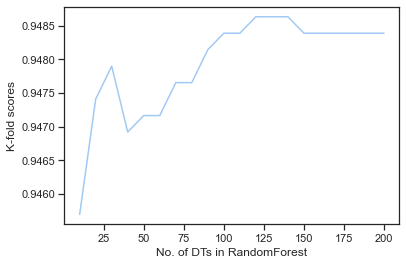

In [412]:
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

NOTE:-The optimum number of decison tress lies between 120 and 150

In [208]:
scores

[0.930963420917053,
 0.9384337970118496,
 0.9366306027820711,
 0.9395929933024214,
 0.9397217928902628,
 0.9395929933024214,
 0.9392065945388975,
 0.9389489953632149,
 0.9379185986604843,
 0.9386913961875322,
 0.9394641937145801,
 0.9403657908294694,
 0.9401081916537868,
 0.9403657908294694,
 0.9406233900051519,
 0.9399793920659454,
 0.9408809891808346,
 0.9411385883565172,
 0.9417825862957238,
 0.9411385883565172]

In [417]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [120,125,130,135,145,150],
            'max_depth': [2,3,4,5,6,7,8,9,10],
        }
model = GridSearchCV(RandomForestClassifier(random_state=0), params,cv=4)
model.fit(X_train1, y_train1)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [120, 125, 130, 135, 145, 150]})

In [418]:
model.best_params_

{'max_depth': 2, 'n_estimators': 120}

In [419]:
model.best_score_

0.9496086105675147

In [420]:
best_model_rf = model.best_estimator_

In [421]:
best_model_rf.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=2, n_estimators=120, random_state=0)

In [422]:
y_pred = best_model_rf.predict(X_test)

In [423]:
print("Cross Validation of X and y Train: ")
print(cross_val_score(best_model_rf,X_train1, y_train1, cv=5).mean())
print("..........."*10)
y_pred = best_model_rf.predict(X_test)
print("Train Accuracy Score: ",best_model_rf.score(X_train1, y_train1))
print("Test Accuracy Score: ",best_model_rf.score(X_test,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

Cross Validation of X and y Train: 
0.9496087121767574
..............................................................................................................
Train Accuracy Score:  0.9496086105675147
Test Accuracy Score:  0.9579256360078278
..............................................................................................................
Confusion Matrix
 
[[979   0]
 [ 43   0]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



### Interpretation
Here we can see that we have an accuracy of 94.9% for the training and 96% for testing ,both the scores indicated a good fit model.The element to be aknowledged is that interms of precision and recall the model works best to identify and return non stroke classes but it fails to do the same for stroke class ,which might be due to the high amount of imbalance in the data

## ADABOOST

In [485]:
from sklearn.ensemble import AdaBoostClassifier
AB_model =RandomForestClassifier()
AB_model.fit(X_train1, y_train1)
y_pred = AB_model.predict(X_test)

In [486]:
print("Cross Validation of X and y Train: ")
print(cross_val_score(AB_model,X_train1, y_train1, cv=5).mean())
print("..........."*10)
y_pred = AB_model.predict(X_test)
print("Train Accuracy Score: ",AB_model.score(X_train1, y_train1))
print("Test Accuracy Score: ",AB_model.score(X_test,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

Cross Validation of X and y Train: 
0.9488749165801295
..............................................................................................................
Train Accuracy Score:  1.0
Test Accuracy Score:  0.9540117416829745
..............................................................................................................
Confusion Matrix
 
[[975   4]
 [ 43   0]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.95      0.94      1022



### Interpretation
Here we can see that we have an accuracy of 100% for the training and 95.4% for testing ,both the scores indicated a good fit model.There is difference between test and train scores but it doesnot indicate overfitting of the model.The element to be aknowledged is that interms of precision and recall the model works best to identify and return non stroke classes but it fails to do the same for stroke class ,which might be due to the high amount of imbalance in the data

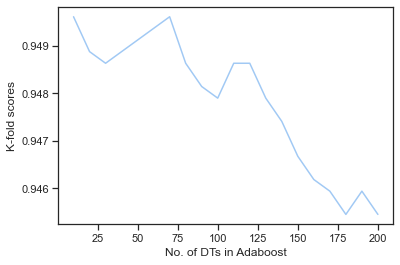

In [425]:


#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,201,10):
    scores.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=0),
                                  X_train1,y_train1,cv=4).mean())
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

### HYPER PARAMETER TUNING

In [427]:
from sklearn.tree import DecisionTreeClassifier
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [70,73,75,78,80],
            'base_estimator': [DecisionTreeClassifier(max_depth=150,random_state=0),
                               DecisionTreeClassifier(max_depth=155,random_state=0),
                               DecisionTreeClassifier(max_depth=160,random_state=0),
                               DecisionTreeClassifier(max_depth=2,random_state=0)],
            'learning_rate': [0.1,0.001,0.5]
        }
model = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=4)
model.fit(X_train1,y_train1)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=150,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=155,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=160,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=2,
                                                                   random_state=0)],
                         'learning_rate': [0.1, 0.001, 0.5],
                         'n_estimators': [70, 73, 75, 78, 80]})

In [428]:
model.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=0),
 'learning_rate': 0.1,
 'n_estimators': 70}

In [429]:
best_model_ab = model.best_estimator_

In [431]:
best_model_ab.fit(X_train1, y_train1)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=0),
                   learning_rate=0.1, n_estimators=70, random_state=0)

In [432]:
model.best_score_

0.949853228962818

In [433]:
y_pred = best_model_ab.predict(X_test)

In [434]:
print("Cross Validation of X and y Train: ")
print(cross_val_score(best_model_ab,X_train1, y_train1, cv=5).mean())
print("..........."*10)
print("Train Accuracy Score: ",best_model_ab.score(X_train1,y_train1))  
print("..........."*10)
y_pred = best_model_ab.predict(X_test)
print("Test Accuracy Score: ",best_model_ab.score(X_test,y_test))  
print("..........."*10)
print("Confusion Matrix")
print(" ")
print(confusion_matrix(y_test, y_pred))
print("..........."*10)
print("Classification Report")
print(" ")
print(classification_report(y_test,y_pred))

Cross Validation of X and y Train: 
0.9491194153576356
..............................................................................................................
Train Accuracy Score:  0.950587084148728
..............................................................................................................
Test Accuracy Score:  0.9530332681017613
..............................................................................................................
Confusion Matrix
 
[[974   5]
 [ 43   0]]
..............................................................................................................
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       979
           1       0.00      0.00      0.00        43

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.95      0.93      1022



### Interpretation
Here we can see that we have an accuracy of 95% for the training and 95.4% for testing ,both the scores indicated a good fit model.Though hyperparameter tuning has not improved the model it eliminated the difference between test and train scores.The element to be aknowledged is that interms of precision and recall the model works best to identify and return non stroke classes but it fails to do the same for stroke class ,which might be due to the high amount of imbalance in the dataThe thing to be noticed hyper parameter tuning has not improved the model.

## COMPARISON OF MODELS

In [437]:
print("LOGISTIC REGRESSION MODEL")
print("..........."*10)
print("Cross Validation of X and y Train: ", cross_val_score(log_model,X_train_scaled, y_train_sm, cv=5).mean())
print(" ")
y_pred = log_model.predict(X_test_scaled)
print(" ")
print("Train Accuracy Score: ",log_model.score(X_train_scaled, y_train_sm)) 
print(" ")
print("Test Accuracy Score: ",log_model.score(X_test_scaled,y_test))  
print("..........."*10)
print("KNN MODEL")
print("..........."*10)
print("Cross Validation of X and y Train: ", cross_val_score(best_model_knn,X_train1, y_train1, cv=5).mean())
print(" "*10)
y_pred = knn.predict(X_test)
print(" ")
print("Train Accuracy Score: ",best_model_knn.score(X_train1, y_train1)) 
print(" ")
print("Test Accuracy Score: ",best_model_knn.score(X_test,y_test))  
print("..........."*10)
print("SVM")
print("..........."*10)
print("Cross Validation of X and y Train: ", cross_val_score(svm,X_train1, y_train1, cv=5).mean())
print(""*10)
y_pred = svm.predict(X_test)
print(" ")
print("Train Accuracy Score: ",svm.score(X_train1, y_train1)) 
print(" ")
print("Test Accuracy Score: ",svm.score(X_test,y_test))  
print("..........."*10)
print("RANDOM FOREST")
print("..........."*10)
print("Cross Validation of X and y Train: ", cross_val_score(best_model_rf,X_train1, y_train1, cv=5).mean())
print(" ")
y_pred = best_model_rf.predict(X_test)
print(" ")
print("Train Accuracy Score: ",best_model_rf.score(X_train1, y_train1)) 
print(" ")
print(" Test Accuracy Score: ",best_model_rf.score(X_test,y_test))  
print(" ")
print("ADABOOST")
print("..........."*10)
print("Cross Validation of X and y Train: ", cross_val_score(best_model_ab,X_train1, y_train1, cv=5).mean())
print(" ")
y_pred = best_model_ab.predict(X_test)
print(" ")
print("Train Accuracy Score: ",best_model_ab.score(X_train1, y_train1)) 
print(" ")
print("Test Accuracy Score: ",best_model_ab.score(X_test,y_test))  
print("..........."*10)

LOGISTIC REGRESSION MODEL
..............................................................................................................
Cross Validation of X and y Train:  0.8016521066641884
 
 
Train Accuracy Score:  0.8025502318392581
 
Test Accuracy Score:  0.7720156555772995
..............................................................................................................
KNN MODEL
..............................................................................................................
Cross Validation of X and y Train:  0.9496087121767574
          
 
Train Accuracy Score:  0.9493639921722113
 
Test Accuracy Score:  0.9569471624266145
..............................................................................................................
SVM
..............................................................................................................
Cross Validation of X and y Train:  0.9496087121767574

 
Train Accuracy Score:  0.9496086105675147
 
Test A

In [468]:
LIST_CV=[cross_val_score(log_model,X_train_scaled, y_train_sm, cv=5).mean()*100,cross_val_score(best_model_knn,X_train1, y_train1, cv=5).mean()*100,cross_val_score(svm,X_train1, y_train1, cv=5).mean()*100,cross_val_score(best_model_rf,X_train1, y_train1, cv=5).mean()*100,cross_val_score(best_model_ab,X_train1, y_train1, cv=5).mean()*100]

In [469]:
listmodel=['Lostics Regression','KNN','SVM','RandomForest','ADABOOST']

In [470]:
LIST_tsAC=[log_model.score(X_test_scaled,y_test)*100,best_model_knn.score(X_test,y_test)*100,svm.score(X_test,y_test)*100,best_model_rf.score(X_test,y_test)*100,best_model_ab.score(X_test,y_test)*100]

In [471]:
LIST_trAC=[log_model.score(X_train_scaled, y_train_sm)*100,best_model_knn.score(X_train1, y_train1)*100,svm.score(X_train1, y_train1)*100,best_model_rf.score(X_train1, y_train1)*100,best_model_ab.score(X_train1, y_train1)*100]

In [472]:

data1 = pd.DataFrame(listmodel, columns=["MODEL"])
data2= pd.DataFrame(LIST_CV, columns=["CROSS VALIDATION SCORE"])
data3=pd.DataFrame(LIST_trAC, columns=["TRAINING SCORE"])
data4=pd.DataFrame(LIST_tsAC, columns=["TEST SCORE"])
data5=pd.concat([data1,data4],axis=1)
model_strength=pd.concat([data1,data2,data3,data4],axis=1)
#print(model_strength)
print(model_strength.sort_values(by=['TEST SCORE'],ascending=False))

                MODEL  CROSS VALIDATION SCORE  TRAINING SCORE  TEST SCORE
2                 SVM               94.960871       94.960861   95.792564
3        RandomForest               94.960871       94.960861   95.792564
1                 KNN               94.960871       94.936399   95.694716
4            ADABOOST               94.911942       95.058708   95.303327
0  Lostics Regression               80.165211       80.255023   77.201566


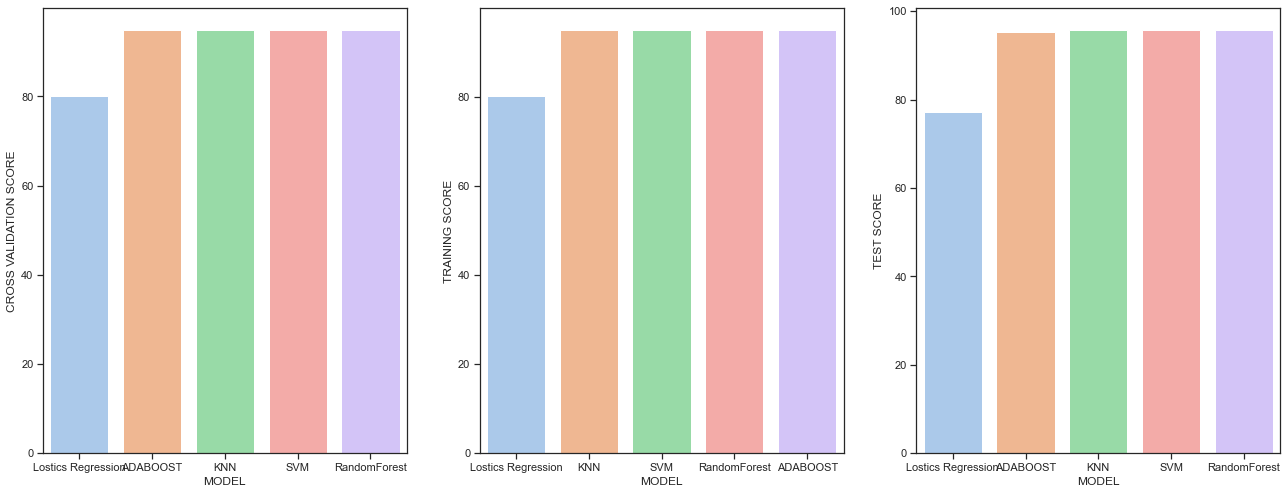

In [473]:
plt.figure(figsize=(30, 18))
plt.subplot(2,4,1)
sns.barplot(x ='MODEL' , y = 'CROSS VALIDATION SCORE', data = model_strength,order=model_strength.sort_values('CROSS VALIDATION SCORE').MODEL)
plt.subplot(2,4,2)
sns.barplot(x='MODEL',y='TRAINING SCORE', data = model_strength,order=model_strength.sort_values('TRAINING SCORE').MODEL)
plt.subplot(2,4,3)
sns.barplot(x='MODEL',y='TEST SCORE', data = model_strength,order=model_strength.sort_values('TEST SCORE').MODEL)

plt.show()

## CONCLUSION

It can be seen that SVM and Random forest has same performnace with same test and and train accuracies.But RandomForest runs faster than SVM. KNN and Adaboost stands at 3rd and 4th place with score with negligible difference from previous ones.Logistic regression has low Accuracies compared to other model but that is the only model with non zero precion and recall for stroke class